In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:/Users/sairam/Downloads/datasets/Universities.csv")

In [3]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [17]:
def norm_func(i):                                   #Min-Max                                  #Min-Max
    x=(i-i.min())/(i.max()-i.min())
    return x

In [18]:
df_norm=norm_func(df.iloc[:,1:])
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [19]:
list_k=list(range(2,16))
list_k

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [20]:
sse=[]

In [21]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'sum of squares')

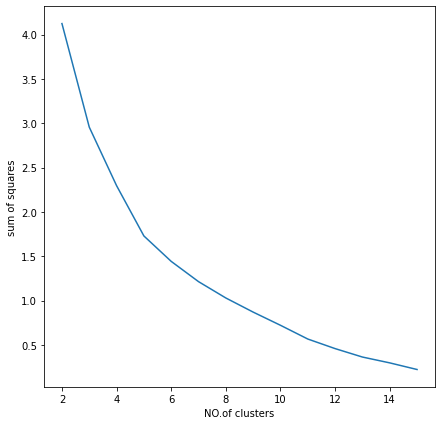

In [22]:
for k in list_k:
    km=KMeans(n_clusters=k)
    km.fit(df_norm)
    sse.append(km.inertia_)
    
#plot sse against k
plt.figure(figsize=(7,7))
plt.plot(list_k,sse)
plt.xlabel("NO.of clusters")
plt.ylabel("sum of squares")

In [23]:
model=KMeans(n_clusters=5)

In [24]:
model.fit(df_norm)

KMeans(n_clusters=5)

In [25]:
model.labels_

array([2, 4, 0, 2, 2, 1, 1, 2, 1, 4, 1, 2, 2, 3, 1, 3, 1, 3, 2, 2, 0, 2,
       2, 3, 1])

In [26]:
ser_u=pd.Series(model.labels_)

In [27]:
ser_u

0     2
1     4
2     0
3     2
4     2
5     1
6     1
7     2
8     1
9     4
10    1
11    2
12    2
13    3
14    1
15    3
16    1
17    3
18    2
19    2
20    0
21    2
22    2
23    3
24    1
dtype: int32

In [28]:
df['cluster']=ser_u

In [29]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,4
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,1
6,Duke,1315,90,30,12,31585,95,1
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,1
9,JohnsHopkins,1305,75,44,7,58691,87,4


In [30]:
df.iloc[:,1:7].groupby(df.cluster).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
cluster,,,,,,
0,1220.000000,63.500000,63.500000,12.500000,20248.000000,78.500000
1,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429
2,1271.000000,81.500000,35.400000,12.900000,23380.000000,89.400000
3,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
4,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000


In [31]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [37]:
z=linkage(df_norm,method='complete',metric='euclidean')

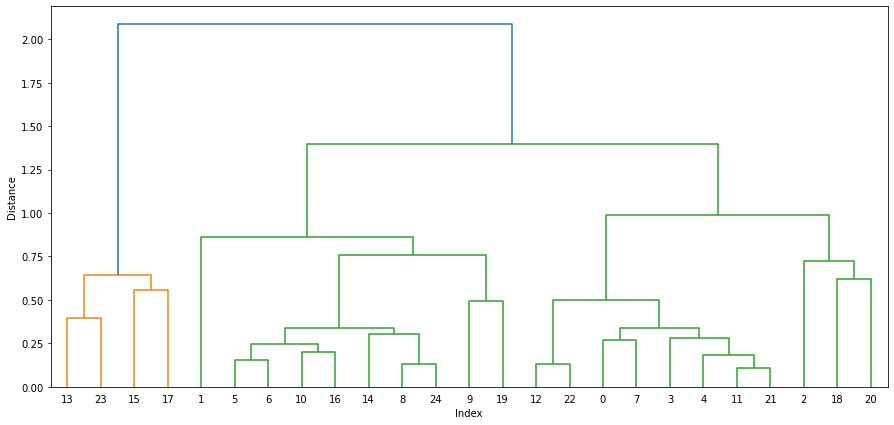

In [38]:
plt.figure(figsize=(15,7))
plt.xlabel("Index")
plt.ylabel("Distance")
sch.dendrogram(z,leaf_rotation=0)
plt.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering

In [40]:
h_comp=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity='euclidean')

In [41]:
model1=h_comp.fit(df_norm)

In [42]:
model1.labels_

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0,
       0, 1, 2], dtype=int64)

In [43]:
clus_lbl=pd.Series(model1.labels_)

In [44]:
df['cluster_h']=clus_lbl

In [45]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster,cluster_h
0,Brown,1310,89,22,13,22704,94,2,0
1,CalTech,1415,100,25,6,63575,81,4,2
2,CMU,1260,62,59,9,25026,72,0,0
3,Columbia,1310,76,24,12,31510,88,2,0
4,Cornell,1280,83,33,13,21864,90,2,0
5,Dartmouth,1340,89,23,10,32162,95,1,2
6,Duke,1315,90,30,12,31585,95,1,2
7,Georgetown,1255,74,24,12,20126,92,2,0
8,Harvard,1400,91,14,11,39525,97,1,2
9,JohnsHopkins,1305,75,44,7,58691,87,4,2
